In [2]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [3]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [4]:
phi_dihedral=['C2','C1','O3','C3']
psi_dihedral=['C1','O3','C3','C4']

di_sugar=['MAN', 'BMA']
patterns1= ['MAN(*_*_)]-BMA(*_*_)', 'MAN(*_*_)-BMA(*_*_)','MAN(*_*_)]-[*]-BMA(*_*_)', 'MAN(*_*_)-[*]-BMA(*_*_)']
patterns2= ['DManpa1-3DManpb', 'DManpa1-3]DManpb', 'DManpa1-3[*]DManpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-3D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['146D', '146D', '1A14', '1ABR', '1ABR', '1AGM', '1AGM', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1AY2', '1B37', '1B5F', '1B5F', '1B5F', '1B5F', '1B5Q', '1BCS', '1BHG', '1BHG', '1BJI', '1BLF', '1BP8', '1BP8', '1BP8', '1BP8', '1BZB', '1C1Z', '1C39', '1C39', '1C3M', '1CAP', '1CF3', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CP8', '1CP8', '1CPO', '1CT1', '1CT1', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1D83', '1D83', '1DBG', '1DBO', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWA', '1DWF', '1DWF', '1DWG', '1DWG', '1DWH', '1DWH', '1DWI', '1DWI', '1DWJ', '1DWJ', '1DZH', '1E04', '1E05', '1E4K', '1E4K', '1E4M', '1E4M', '1E6Q', '1E6Q', '1E6S', '1E6S', '1E6X', '1E6X', '1E70', '1E70', '1E71', '1E71', '1E72', '1E72', '1E73', '1E73

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [4]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 99 files.


In [5]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 99 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [6]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 9886 
valid torsion1 and torsion2: (9886, 9886)


In [7]:
instant1.calc_BFactor()

In [8]:
instant1.find_bfmp_ring_shape()

(['6.E', '3.E'], ['-', '4C1'])
(['4.E', '3.E'], ['-', '4C1'])
(['7.F', '3.F'], ['4C1', '4C1'])
(['6.F', '3.F'], ['-', '4C1'])
(['4.F', '3.F'], ['-', '4C1'])
(['4.B', '3.B'], ['4C1', '-'])
(['5.B', '3.B'], ['4C1', '-'])
(['6.G', '3.G'], ['OS2', '4C1'])
(['4.G', '3.G'], ['4C1', '4C1'])
(['4.q', '3.q'], ['-', '4C1'])
(['5.q', '3.q'], ['4C1', '4C1'])
(['4.c', '3.c'], ['4C1', '4C1'])
(['5.c', '3.c'], ['4C1', '4C1'])
(['4.j', '3.j'], ['B25', '-'])
(['5.j', '3.j'], ['4C1', '-'])
(['4.k', '3.k'], ['1C4', '4C1'])
(['5.k', '3.k'], ['4C1', '4C1'])
(['4.e', '3.e'], ['4C1', '4C1'])
(['5.e', '3.e'], ['4C1', '4C1'])
(['4.i', '3.i'], ['BO3', '4C1'])
(['4.a', '3.a'], ['1C4', '4C1'])
(['5.a', '3.a'], ['4C1', '4C1'])
(['4.h', '3.h'], ['4C1', '4C1'])
(['5.h', '3.h'], ['4C1', '4C1'])
(['4.n', '3.n'], ['BO3', '4C1'])
(['5.n', '3.n'], ['4C1', '4C1'])
(['4.t', '3.t'], ['4C1', '4C1'])
(['5.t', '3.t'], ['-', '4C1'])
(['4.C', '3.C'], ['-', '4C1'])
(['5.C', '3.C'], ['4C1', '4C1'])
(['4.P', '3.P'], ['4C1', '4C1'])

In [9]:
output_df = instant1.match_glycan_tree()

../../pdbs//3x1b.pdb E MAN 6 C1
../../pdbs//3x1b.pdb E BMA 3 O3
7836 7810
Connection found between 7836 and 7810
../../pdbs//3x1b.pdb E MAN 4 C1
../../pdbs//3x1b.pdb E BMA 3 O3
7814 7810
No connection found between 7814 and 7810
1
../../pdbs//3x1b.pdb F MAN 7 C1
../../pdbs//3x1b.pdb F BMA 3 O3
7919 7882
Connection found between 7919 and 7882
../../pdbs//3x1b.pdb F MAN 6 C1
../../pdbs//3x1b.pdb F BMA 3 O3
7908 7882
No connection found between 7908 and 7882
3
../../pdbs//3x1b.pdb F MAN 4 C1
../../pdbs//3x1b.pdb F BMA 3 O3
7886 7882
No connection found between 7886 and 7882
4
../../pdbs//5lfu.pdb B MAN 4 C1
../../pdbs//5lfu.pdb B BMA 3 O3
3817 3813
Connection found between 3817 and 3813
../../pdbs//5lfu.pdb B MAN 5 C1
../../pdbs//5lfu.pdb B BMA 3 O3
3828 3813
No connection found between 3828 and 3813
6
../../pdbs//7y1t.pdb G MAN 6 C1
../../pdbs//7y1t.pdb G BMA 3 O3
8029 8003
Connection found between 8029 and 8003
../../pdbs//7y1t.pdb G MAN 4 C1
../../pdbs//7y1t.pdb G BMA 3 O3
8007 8003
No

In [10]:
output_df.to_csv('DManpa1-3DManpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DManpa1-3DManpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [11]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [12]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,3x1b.pdb,E MAN 6 C2 C1 BMA 3 O3 C3,E MAN 6 C1 BMA 3 O3 C3 C4,192.01200,120.3980,"([MAN(6_E_), BMA(3_E_)], [62.32, 53.77])",MAN(5_E_)-MAN(4_E_)-[MAN(6_E_)]-BMA(3_E_)-NAG(...,DManpa1-3DManpa1-6[DManpa1-3]DManpb1-4DGlcpNAc...,"([6.E, 3.E], [-, 4C1])"
1,3x1b.pdb,E MAN 4 C2 C1 BMA 3 O3 C3,E MAN 4 C1 BMA 3 O3 C3 C4,222.76000,342.1997,"([MAN(4_E_), BMA(3_E_)], [73.66, 53.77])",MAN(5_E_)-MAN(4_E_)-[MAN(6_E_)]-BMA(3_E_)-NAG(...,DManpa1-3DManpa1-6[DManpa1-3]DManpb1-4DGlcpNAc...,"([4.E, 3.E], [-, 4C1])"
2,3x1b.pdb,F MAN 7 C2 C1 BMA 3 O3 C3,F MAN 7 C1 BMA 3 O3 C3 C4,218.21700,141.4400,"([MAN(7_F_), BMA(3_F_)], [79.54, 69.86])",MAN(6_F_)-[MAN(5_F_)]-MAN(4_F_)-[MAN(7_F_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([7.F, 3.F], [4C1, 4C1])"
3,3x1b.pdb,F MAN 6 C2 C1 BMA 3 O3 C3,F MAN 6 C1 BMA 3 O3 C3 C4,46.67690,319.0127,"([MAN(6_F_), BMA(3_F_)], [73.3, 69.86])",MAN(6_F_)-[MAN(5_F_)]-MAN(4_F_)-[MAN(7_F_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([6.F, 3.F], [-, 4C1])"
4,3x1b.pdb,F MAN 4 C2 C1 BMA 3 O3 C3,F MAN 4 C1 BMA 3 O3 C3 C4,6.63437,340.3150,"([MAN(4_F_), BMA(3_F_)], [77.65, 69.86])",MAN(6_F_)-[MAN(5_F_)]-MAN(4_F_)-[MAN(7_F_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([4.F, 3.F], [-, 4C1])"
...,...,...,...,...,...,...,...,...,...
9881,5l5c.pdb,I MAN 6 C2 C1 BMA 3 O3 C3,I MAN 6 C1 BMA 3 O3 C3 C4,215.74500,132.4420,"([MAN(6_I_), BMA(3_I_)], [431.97, 431.97])",MAN(5_I_)-MAN(4_I_)-[MAN(6_I_)]-BMA(3_I_)-NAG(...,DManpa1-3DManpa1-6[DManpa1-3]DManpb1-4DGlcpNAc...,"([6.I, 3.I], [4C1, 4C1])"
9882,5l5c.pdb,I MAN 4 C2 C1 BMA 3 O3 C3,I MAN 4 C1 BMA 3 O3 C3 C4,12.54300,335.6756,"([MAN(4_I_), BMA(3_I_)], [431.97, 431.97])",MAN(5_I_)-MAN(4_I_)-[MAN(6_I_)]-BMA(3_I_)-NAG(...,DManpa1-3DManpa1-6[DManpa1-3]DManpb1-4DGlcpNAc...,"([4.I, 3.I], [4C1, 4C1])"
9883,5l5c.pdb,E MAN 6 C2 C1 BMA 3 O3 C3,E MAN 6 C1 BMA 3 O3 C3 C4,210.76800,113.2830,"([MAN(6_E_), BMA(3_E_)], [269.04, 269.04])",MAN(5_E_)-MAN(4_E_)-[MAN(6_E_)]-BMA(3_E_)-NAG(...,DManpa1-3DManpa1-6[DManpa1-3]DManpb1-4DGlcpNAc...,"([6.E, 3.E], [4C1, -])"
9884,5l5c.pdb,E MAN 4 C2 C1 BMA 3 O3 C3,E MAN 4 C1 BMA 3 O3 C3 C4,11.11440,327.5922,"([MAN(4_E_), BMA(3_E_)], [269.04, 269.04])",MAN(5_E_)-MAN(4_E_)-[MAN(6_E_)]-BMA(3_E_)-NAG(...,DManpa1-3DManpa1-6[DManpa1-3]DManpb1-4DGlcpNAc...,"([4.E, 3.E], [4C1, -])"


In [7]:
import pandas as pd
output_df = pd.read_csv('DManpa1-3DManpb_ver2.1.csv')

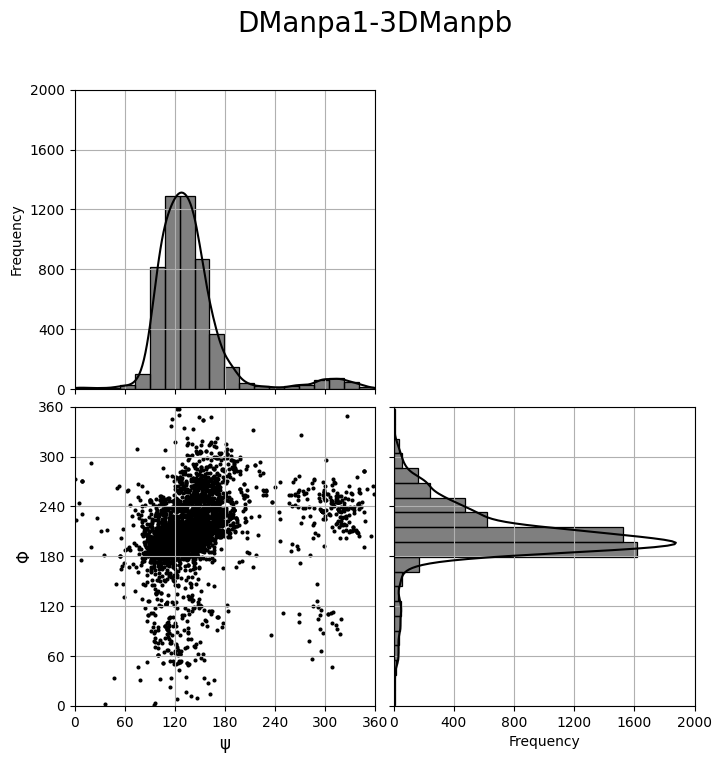

In [9]:
instant1.plot(torsions=output_df, title='DManpa1-3DManpb',max_histogram_scale=2000,step_histogram_tick=400)